# Principal compoenet analysis 실습

대부분의 머신러닝을 모듈에 포함하고, 이에 대한 예제와 정보가 담겨있는 웹사이트 참고: https://scikit-learn.org

# 1. 데이터 전처리 및 데이터 파악

- scikit-lean 패키지에서 데이터와 PCA 로드.

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

C:\Users\jhyun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jhyun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


- 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jhyun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jhyun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


- iris 데이터를 불러오고, 구조를 살핌.

In [6]:
iris=datasets.load_iris() #꽃잎 데이터??
dir(iris) #데이터가 어떠한 속성을 포함하고 있는 지를 알려준다.

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

- 설명의 편의를 위하여, 독립변수 중 처음 2개만을 사용.

In [56]:
X=iris.data[:,[0,2]]
#ndarray에 대해서 행/열의 일부분을 slicing해서 추출
print(iris.feature_names)
Y=iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print(X.shape)
feature_names=[iris.feature_names[0],iris.feature_names[2]]
df_X=pd.DataFrame(X)
df_X.head()


(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [15]:
print(Y.shape)
df_Y=pd.DataFrame(Y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치 여부를 파악.

In [110]:
print(df_X.iloc[[1,2,3]])
print(df_X.loc[[1,2,3]])
print(df_X.isnull().sum())
print(df_Y.isnull().sum())
print(df_X.head())

     0    1
1  4.9  1.4
2  4.7  1.3
3  4.6  1.5
     0    1
1  4.9  1.4
2  4.7  1.3
3  4.6  1.5
0    0
1    0
dtype: int64
0    0
dtype: int64
     0    1
0  5.1  1.4
1  4.9  1.4
2  4.7  1.3
3  4.6  1.5
4  5.0  1.4


In [18]:
print(set(Y))
iris.target_names

{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 종속 변수 (출력변수, 반응변수)의 분포를 살핌.

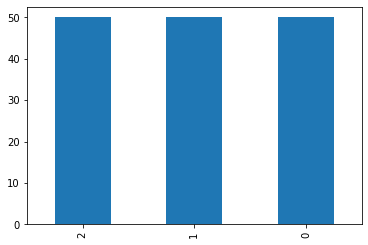

In [22]:
df_Y[0].value_counts().plot(kind='bar')
plt.show()

- 독립 변수 (속성, 입력변수, 설명변수)의 분포를 살핌.

(150, 2)


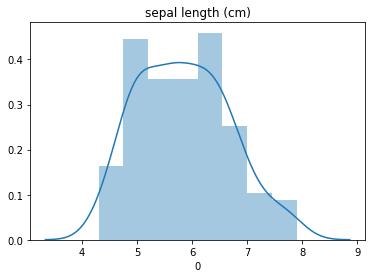

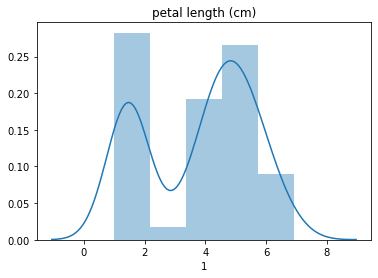

In [111]:
print(df_X.shape)
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# 2. PCA 함수 활용 및 아웃풋 의미파악

- PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC 2개를 뽑아냄.

In [24]:
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여, 회귀분석에 활용할 수 있음.

In [29]:
print(pca.components_)
print(pca.explained_variance_)
PCscore=pca.transform(X)
PCscore[0:5]

[[ 0.39360585  0.9192793 ]
 [-0.9192793   0.39360585]]
[3.66189877 0.1400726 ]


array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [30]:
eigens_v=pca.components_.transpose()
print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [35]:
#X 에 대해서 centering을 진행한다.
mX=np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])
dfmX=pd.DataFrame(mX)
dfmX

,0,1
0,-0.743333,-2.358
1,-0.943333,-2.358
2,-1.143333,-2.458
3,-1.243333,-2.258
4,-0.843333,-2.358
...,...,...
145,0.856667,1.442
146,0.456667,1.242
147,0.656667,1.442
148,0.356667,1.642


In [34]:
(mX*eigens_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

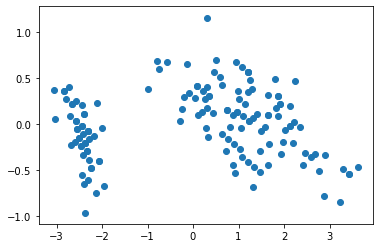

In [36]:
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

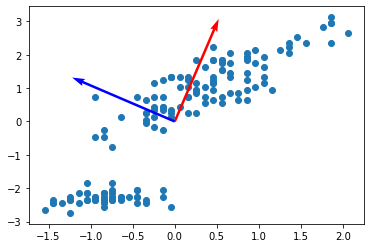

In [37]:
plt.scatter(dfmX[0],dfmX[1])
origin = [0], [0] # origin point
plt.quiver(*origin, eigens_v[0,:], eigens_v[1,:], color=['r','b'], scale=3)
plt.show()

# 3. PC를 활용한 회귀분석

- 이번에는 모든 독립변수를 활용하여 PC를 뽑아냄.

In [38]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [40]:
PCs=pca2.transform(X2)[:,0:2]

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [45]:
clf= LogisticRegression(solver="sag",multi_class="multinomial").fit(X2,Y)

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


- PC 2개 만을 뽑아내여 분석한 경우 모델이 수렴.

In [46]:
clf2= LogisticRegression(solver="sag",multi_class="multinomial").fit(PCs,Y)

In [50]:
confusion_matrix(Y,clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

- 임의로 변수 2개 만을 뽑아내여 분석한 경우 모델의 퍼포먼스가 하락함.

In [52]:
clf3 = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                             multi_class="multinomial").fit(X2[:,0:2], Y)

In [53]:
confusion_matrix(Y, clf3.predict(X2[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

- 위와 같이, 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있음.